#FINANCIAL INCLUSION DETERMINATION

**a) Data Analytic Questions**

  *Assess the financial inclusion status in select East African countries based on Finscope financial surveys data ranging from 2016 to 2018*
  *Identifying factors that influence whether an individual has a bank account or not.*


```
# This is formatted as code
```


**b) Success Metrics**
*Sucessful prediction of individuals most likely to have or use a bank account.**


```
# This is formatted as code
```


**c) context**
*Financial Inclusion remains one of the main obstacles to economic and human development in Africa.In the East African Region only 9.1 million adults (or 13.9% of the adult population) have access to or use a commercial bank account.Generally,Traditionally, access to bank accounts has been regarded as an indicator of financial inclusion.*


```
# This is formatted as code
```


**d) Experimental Design**

```
# This is formatted as code
```


*Formulation of the research question*

*Loading the data*

*Check the data*

*Validating the data*

*Formulate the solution*

*Challenge the solution*

*Follow up*


#DATA ANALYSIS AND MODELING

#Loading required libraries

In [301]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib
from matplotlib import pyplot as plt





#Loading the Financial_Dataset

In [302]:
#Reading in the Data
Financial_Dataset = pd.read_csv('Financial_Dataset.csv')
Financial_Dataset.head()

,country,year,uniqueid,Has a Bank account,Type of Location,Cell Phone Access,household_size,Respondent Age,gender_of_respondent,The relathip with head,marital_status,Level of Educuation,Type of Job
0,Kenya,2018,uniqueid_1,Yes,Rural,Yes,3.0,24.0,Female,Spouse,Married/Living together,Secondary education,Self employed
1,Kenya,2018,uniqueid_2,No,Rural,No,5.0,70.0,Female,Head of Household,Widowed,No formal education,Government Dependent
2,Kenya,2018,uniqueid_3,Yes,Urban,Yes,5.0,26.0,Male,Other relative,Single/Never Married,Vocational/Specialised training,Self employed
3,Kenya,2018,uniqueid_4,No,Rural,Yes,5.0,34.0,Female,Head of Household,Married/Living together,Primary education,Formally employed Private
4,Kenya,2018,uniqueid_5,No,Urban,No,8.0,26.0,Male,Child,Single/Never Married,Primary education,Informally employed


#Check out the Data

*Check out variables types and descriptive statistics*

In [303]:
#Determining the no. of records in our dataset.
Financial_Dataset.shape

(23524, 13)

In [304]:
#Check whether each column has an appropriate datatype.
Financial_Dataset.dtypes


country                    object
year                        int64
uniqueid                   object
Has a Bank account         object
Type of Location           object
Cell Phone Access          object
household_size            float64
Respondent Age            float64
gender_of_respondent       object
The relathip with head     object
marital_status             object
Level of Educuation        object
Type of Job                object
dtype: object

In [305]:
#Previewing the top of our dataset
Financial_Dataset.head(3)


,country,year,uniqueid,Has a Bank account,Type of Location,Cell Phone Access,household_size,Respondent Age,gender_of_respondent,The relathip with head,marital_status,Level of Educuation,Type of Job
0,Kenya,2018,uniqueid_1,Yes,Rural,Yes,3.0,24.0,Female,Spouse,Married/Living together,Secondary education,Self employed
1,Kenya,2018,uniqueid_2,No,Rural,No,5.0,70.0,Female,Head of Household,Widowed,No formal education,Government Dependent
2,Kenya,2018,uniqueid_3,Yes,Urban,Yes,5.0,26.0,Male,Other relative,Single/Never Married,Vocational/Specialised training,Self employed


In [306]:
#Previewing the bottom of our dataset
Financial_Dataset.tail(3)

,country,year,uniqueid,Has a Bank account,Type of Location,Cell Phone Access,household_size,Respondent Age,gender_of_respondent,The relathip with head,marital_status,Level of Educuation,Type of Job
23521,Uganda,2018,uniqueid_2115,No,Rural,Yes,5.0,27.0,Female,Parent,Widowed,Primary education,Other Income
23522,Uganda,2018,uniqueid_2116,No,Urban,Yes,7.0,30.0,Female,Parent,Divorced/Seperated,Secondary education,Self employed
23523,Uganda,2018,uniqueid_2117,No,Rural,Yes,10.0,20.0,Male,Child,Single/Never Married,Secondary education,No Income


*Measures of central tendency*

In [307]:
#Preview each column and check the measures of central tendency
Financial_Dataset.describe(include='all')

,country,year,uniqueid,Has a Bank account,Type of Location,Cell Phone Access,household_size,Respondent Age,gender_of_respondent,The relathip with head,marital_status,Level of Educuation,Type of Job
count,23510,23524.000000,23524,23488,23509,23513,23496.000000,23490.000000,23490,23520,23492,23495,23494
unique,4,NaN,8735,2,2,2,NaN,NaN,2,6,5,7,10
top,Rwanda,NaN,uniqueid_525,No,Rural,Yes,NaN,NaN,Female,Head of Household,Married/Living together,Primary education,Self employed
freq,8735,NaN,4,20179,14338,17449,NaN,NaN,13859,12829,10739,12775,6428
mean,NaN,2016.979000,NaN,NaN,NaN,NaN,3.681818,38.804300,NaN,NaN,NaN,NaN,NaN
std,NaN,0.899669,NaN,NaN,NaN,NaN,2.279933,16.519996,NaN,NaN,NaN,NaN,NaN
min,NaN,2016.000000,NaN,NaN,NaN,NaN,0.000000,16.000000,NaN,NaN,NaN,NaN,NaN
25%,NaN,2016.000000,NaN,NaN,NaN,NaN,2.000000,26.000000,NaN,NaN,NaN,NaN,NaN
50%,NaN,2017.000000,NaN,NaN,NaN,NaN,3.000000,35.000000,NaN,NaN,NaN,NaN,NaN
75%,NaN,2018.000000,NaN,NaN,NaN,NaN,5.000000,49.000000,NaN,NaN,NaN,NaN,NaN


#Tidying the Dataset


*Standardize column names*





In [308]:
# Standardize column names

Financial_Dataset.columns = ['country','year','uniqueid','Has_a_Bank_account' ,'Type_of_Location',
'Cell_Phone_Access','household_size','Respondent_Age','gender_of_respondent',
'The_relathip_with_head','marital_status','Level_of_Educuation','Type_of_Job' ]
Financial_Dataset.head(3)

,country,year,uniqueid,Has_a_Bank_account,Type_of_Location,Cell_Phone_Access,household_size,Respondent_Age,gender_of_respondent,The_relathip_with_head,marital_status,Level_of_Educuation,Type_of_Job
0,Kenya,2018,uniqueid_1,Yes,Rural,Yes,3.0,24.0,Female,Spouse,Married/Living together,Secondary education,Self employed
1,Kenya,2018,uniqueid_2,No,Rural,No,5.0,70.0,Female,Head of Household,Widowed,No formal education,Government Dependent
2,Kenya,2018,uniqueid_3,Yes,Urban,Yes,5.0,26.0,Male,Other relative,Single/Never Married,Vocational/Specialised training,Self employed


*Missing value analysis*

In [309]:
#Check if there are any null values in the dataset.

Financial_Dataset.isnull().values.any()

True

In [310]:
#Count the total number of missing values across the columns

Financial_Dataset.isnull().sum()

country                   14
year                       0
uniqueid                   0
Has_a_Bank_account        36
Type_of_Location          15
Cell_Phone_Access         11
household_size            28
Respondent_Age            34
gender_of_respondent      34
The_relathip_with_head     4
marital_status            32
Level_of_Educuation       29
Type_of_Job               30
dtype: int64

*Dealing with the Missing Data*

In [311]:
#Drop Rows with NaN Values  and check shape
Financial_Dataset = Financial_Dataset.dropna()
Financial_Dataset.shape

(23343, 13)

*Outlier detection analysis*

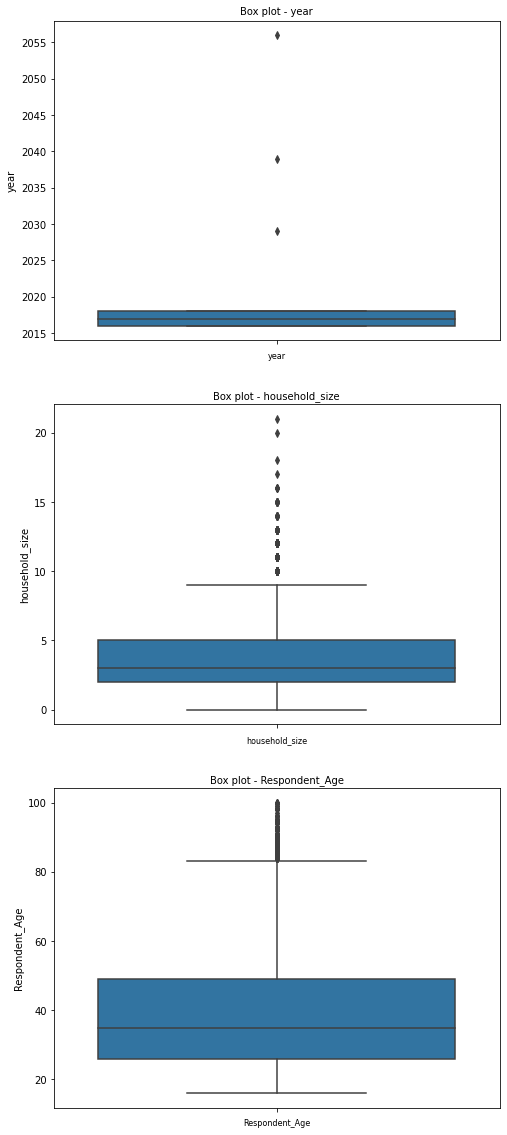

In [312]:
col_names= ['year','household_size','Respondent_Age']

fig, ax = plt.subplots(len(col_names), figsize=(8,20))

for i, col_val in enumerate(col_names):

    sns.boxplot(y=Financial_Dataset[col_val], ax=ax[i])
    ax[i].set_title('Box plot - {}'.format(col_val), fontsize=10)
    ax[i].set_xlabel(col_val, fontsize=8)

plt.show()


In [133]:
Financial_Dataset.shape

(23343, 13)

*Percentile based outlier removal*


/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2056: FutureWarning: The `axis` variable is no longer used and will be removed. Instead, assign variables directly to `x` or `y`.
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/dis

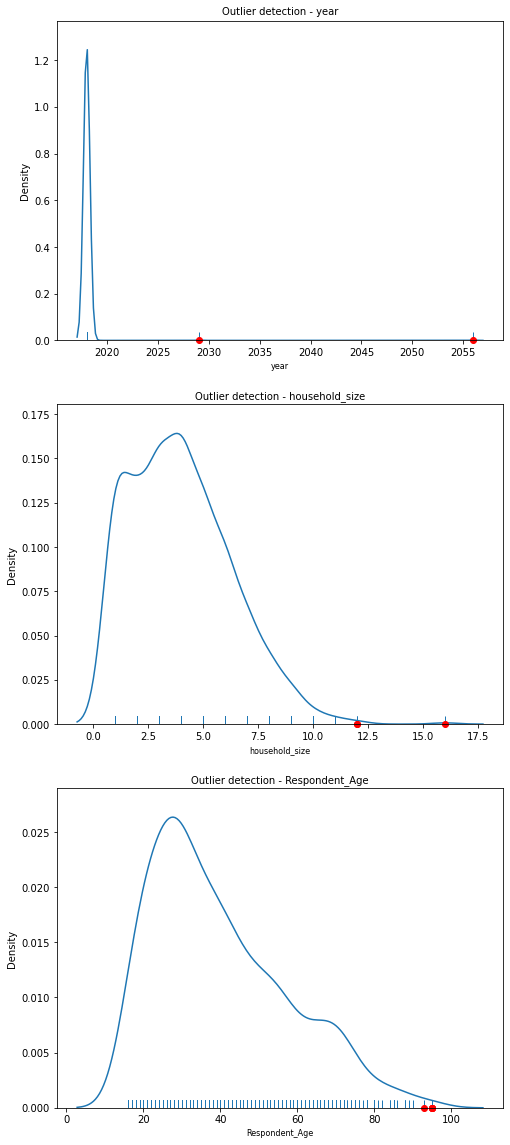

In [313]:
#Values marked with a red dot below in the x-axis of the graph are the ones that are removed
#from the column based on the set threshold percentile (95 in our case), and
#is also the default value when it comes to percentile-based outlier removal.

def percentile_based_outlier(data, threshold=99):
    diff = (100 - threshold) / 2
    minval, maxval = np.percentile(data, [diff, 100 - diff])
    return (data < minval) | (data > maxval)

col_names = ['year','household_size','Respondent_Age']

fig, ax = plt.subplots(len(col_names), figsize=(8,20))

for i, col_val in enumerate(col_names):
    x = Financial_Dataset[col_val][:1000]
    sns.distplot(x, ax=ax[i], rug=True, hist=False)
    outliers = x[percentile_based_outlier(x)]
    ax[i].plot(outliers, np.zeros_like(outliers), 'ro', clip_on=False)

    ax[i].set_title('Outlier detection - {}'.format(col_val), fontsize=10)
    ax[i].set_xlabel(col_val, fontsize=8)

plt.show()

#UNIVARIATE AND BIVARIATE ANALYSIS

*Intercountry Comparison country*

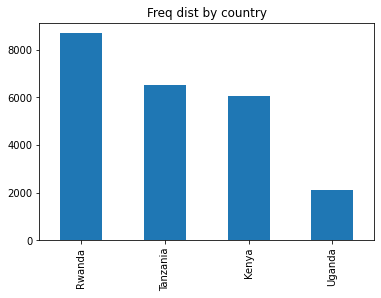

In [314]:
Financial_Dataset['country'].value_counts().plot.bar(title='Freq dist by country')

*year*

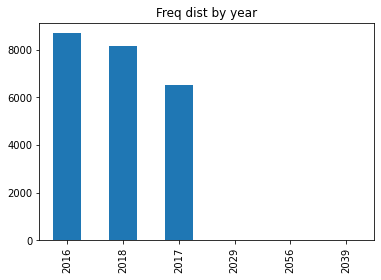

In [254]:

Financial_Dataset['year'].value_counts().plot.bar(title='Freq dist by year')

*Has a Bank account*

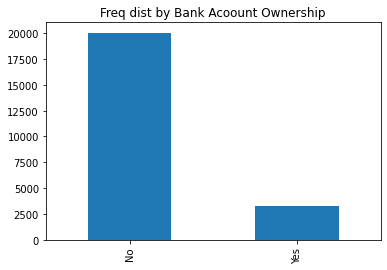

In [255]:
Financial_Dataset['Has_a_Bank_account'].value_counts().plot.bar(title='Freq dist by Bank Acoount Ownership')

*Type of Location*

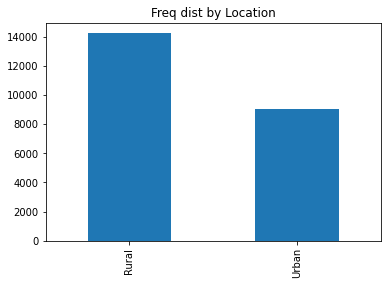

In [260]:
Financial_Dataset['Type_of_Location'].value_counts().plot.bar(title='Freq dist by Location')


*Cell Phone Access*

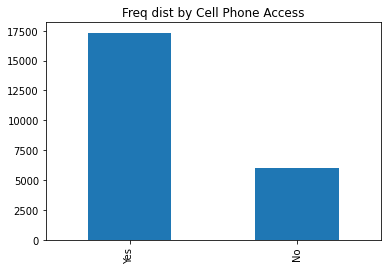

In [262]:

Financial_Dataset['Cell_Phone_Access'].value_counts().plot.bar(title='Freq dist by Cell Phone Access')

*household_size*

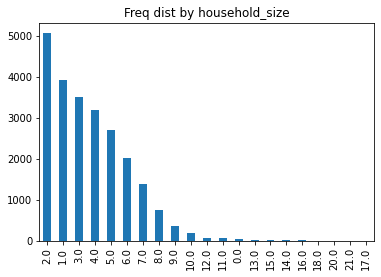

In [263]:
Financial_Dataset['household_size'].value_counts().plot.bar(title='Freq dist by household_size')

*gender_of_respondent*

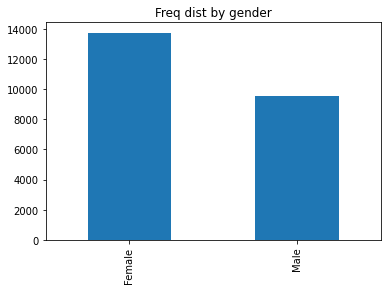

In [264]:

Financial_Dataset['gender_of_respondent'].value_counts().plot.bar(title='Freq dist by gender')

*marital_status*

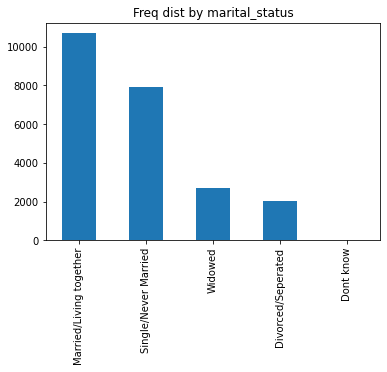

In [265]:

Financial_Dataset['marital_status'].value_counts().plot.bar(title='Freq dist by marital_status')

*Level of Educuation*

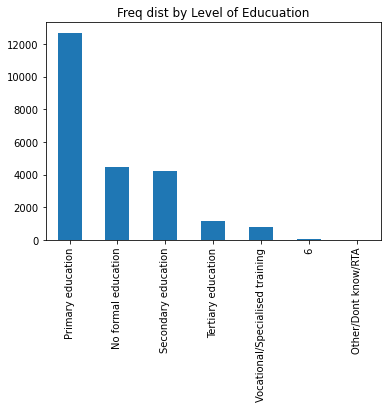

In [267]:

Financial_Dataset['Level_of_Educuation'].value_counts().plot.bar(title='Freq dist by Level of Educuation')


*Type of Job*

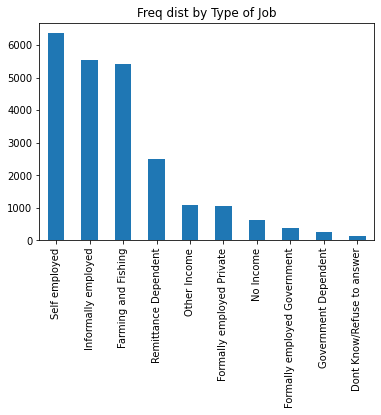

In [268]:

Financial_Dataset['Type_of_Job'].value_counts().plot.bar(title='Freq dist by Type of Job')


#Crosstab Visualizations

*Account holders by Country*

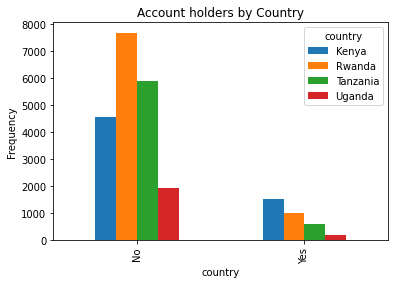

In [315]:
pd.crosstab(Financial_Dataset.Has_a_Bank_account,Financial_Dataset.country).plot(kind='bar')
plt.title('Account holders by Country')
plt.xlabel('country')
plt.ylabel('Frequency')
plt.show()

*Account holders by Gender*

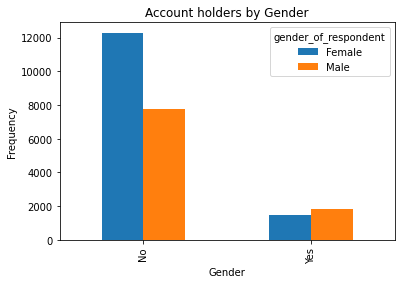

In [270]:
pd.crosstab(Financial_Dataset.Has_a_Bank_account,Financial_Dataset.gender_of_respondent).plot(kind='bar')
plt.title('Account holders by Gender')
plt.xlabel('Gender')
plt.ylabel('Frequency')
plt.show()

*Account holders by marital status*

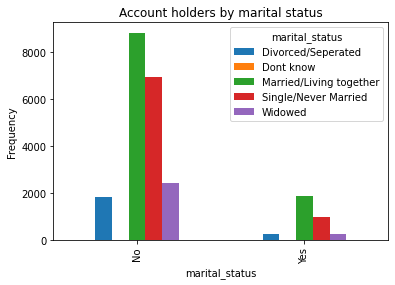

In [271]:
pd.crosstab(Financial_Dataset.Has_a_Bank_account,Financial_Dataset.marital_status).plot(kind='bar')
plt.title('Account holders by marital status')
plt.xlabel('marital_status')
plt.ylabel('Frequency')
plt.show()

*Account holder by Level of Educuation*

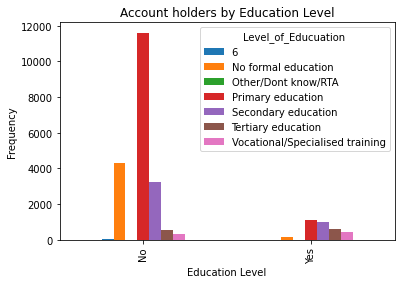

In [273]:
pd.crosstab(Financial_Dataset.Has_a_Bank_account,Financial_Dataset.Level_of_Educuation).plot(kind='bar')
plt.title('Account holders by Education Level')
plt.xlabel('Education Level')
plt.ylabel('Frequency')
plt.show()

Account holder by Cell Phone Access

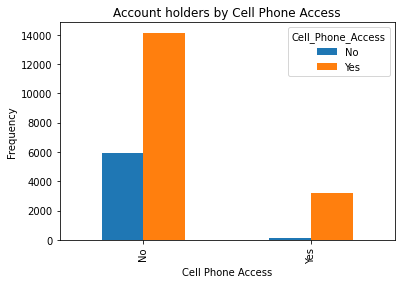

In [275]:
pd.crosstab(Financial_Dataset.Has_a_Bank_account,Financial_Dataset.Cell_Phone_Access).plot(kind='bar')
plt.title('Account holders by Cell Phone Access')
plt.xlabel('Cell Phone Access')
plt.ylabel('Frequency')
plt.show()

Account holder by Location

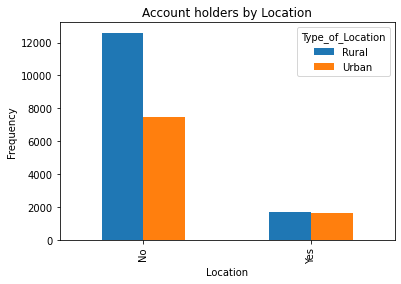

In [276]:
pd.crosstab(Financial_Dataset.Has_a_Bank_account,Financial_Dataset.Type_of_Location).plot(kind='bar')
plt.title('Account holders by Location')
plt.xlabel('Location')
plt.ylabel('Frequency')
plt.show()

Acoount holder by Type of Job'

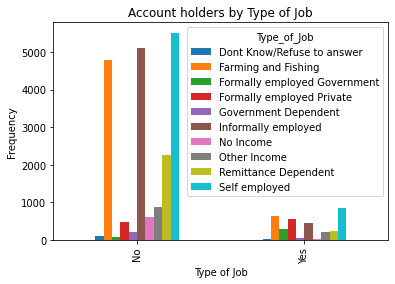

In [279]:
pd.crosstab(Financial_Dataset.Has_a_Bank_account,Financial_Dataset.Type_of_Job).plot(kind='bar')
plt.title('Account holders by Type of Job')
plt.xlabel('Type of Job')
plt.ylabel('Frequency')
plt.show()

 Account holder by household_size 

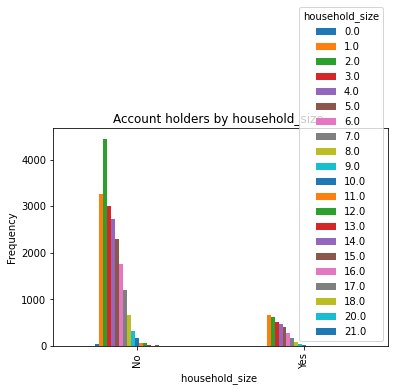

In [280]:
 pd.crosstab(Financial_Dataset.Has_a_Bank_account,Financial_Dataset.household_size).plot(kind='bar')
plt.title('Account holders by household_size ')
plt.xlabel('household_size ')
plt.ylabel('Frequency')
plt.show()

#*univariate distribution of the numerical columns*

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function 

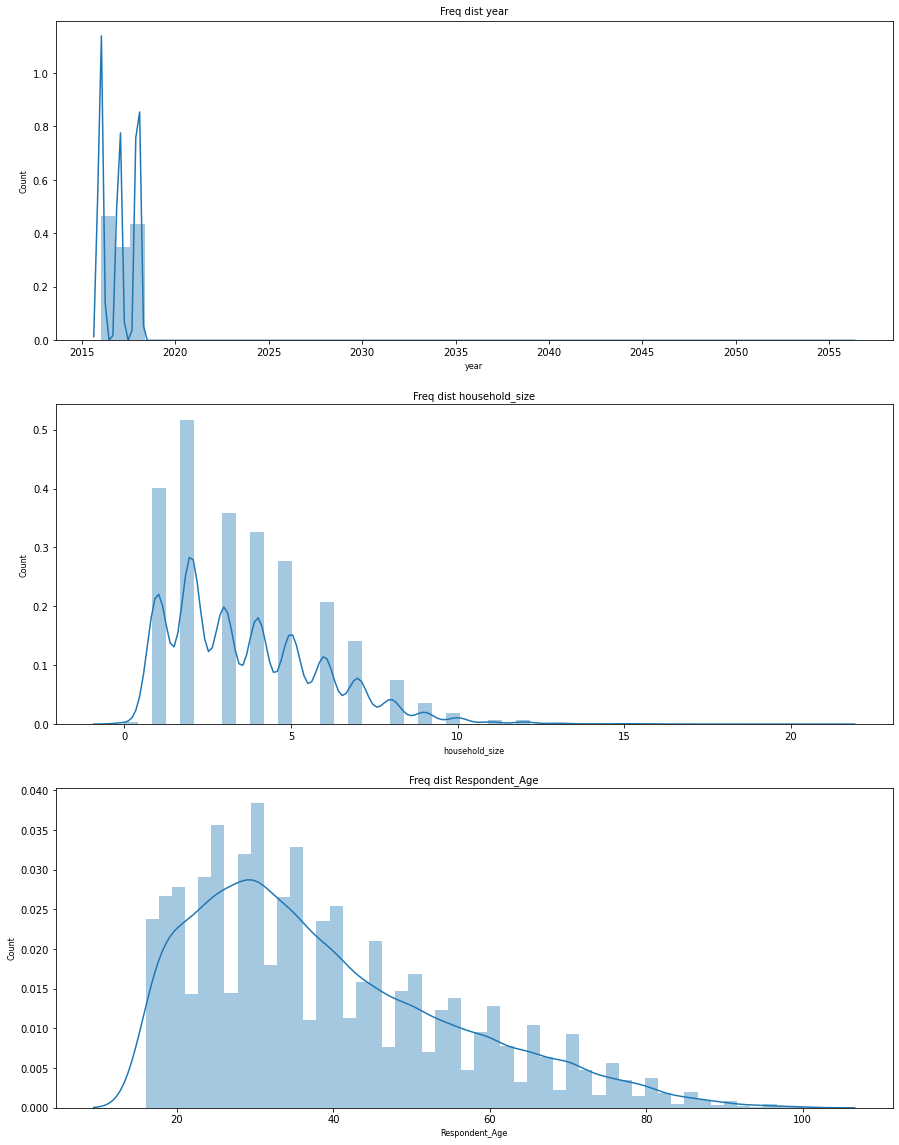

In [316]:
#We use displot of the seaborn library to plot this graph
col_names = ['year','household_size','Respondent_Age']

fig, ax = plt.subplots(len(col_names), figsize=(15,20))

for i, col_val in enumerate(col_names):

    sns.distplot(Financial_Dataset[col_val], hist=True, ax=ax[i])
    ax[i].set_title('Freq dist '+col_val, fontsize=10)
    ax[i].set_xlabel(col_val, fontsize=8)
    ax[i].set_ylabel('Count', fontsize=8)

plt.show()

#**Label Encoding**

**Convert categorical variables into numerical values for further processing.**

In [317]:
#We start by checking variable types
Financial_Dataset.dtypes

country                    object
year                        int64
uniqueid                   object
Has_a_Bank_account         object
Type_of_Location           object
Cell_Phone_Access          object
household_size            float64
Respondent_Age            float64
gender_of_respondent       object
The_relathip_with_head     object
marital_status             object
Level_of_Educuation        object
Type_of_Job                object
dtype: object

In [318]:
# next we change variable types.
Financial_Dataset["Has_a_Bank_account"] = Financial_Dataset["Has_a_Bank_account"].astype('category')
Financial_Dataset["Type_of_Location"] = Financial_Dataset["Type_of_Location"].astype('category')
Financial_Dataset["Cell_Phone_Access"] = Financial_Dataset["Cell_Phone_Access"].astype('category')
Financial_Dataset["household_size"] = Financial_Dataset["household_size"].astype('int64')
Financial_Dataset["Respondent_Age"] = Financial_Dataset["Respondent_Age"].astype('int64')
Financial_Dataset["The_relathip_with_head"] = Financial_Dataset["The_relathip_with_head"].astype('category')
Financial_Dataset["gender_of_respondent"] = Financial_Dataset["gender_of_respondent"].astype('category')
Financial_Dataset["marital_status"] = Financial_Dataset["marital_status"].astype('category')
Financial_Dataset["Level_of_Educuation"] = Financial_Dataset["Level_of_Educuation"].astype('category')
Financial_Dataset["Type_of_Job"] = Financial_Dataset["Type_of_Job"].astype('category')


In [ ]:
#Drop unneccessary columns
Financial_Dataset= Financial_Dataset.drop(['uniqueid','country','year'],axis=1)

In [325]:
#Next we encoded variable via the cat.codes accessor
Financial_Dataset["Has_a_Bank_account"] = Financial_Dataset["Has_a_Bank_account"].cat.codes
Financial_Dataset["Type_of_Location"] = Financial_Dataset["Type_of_Location"].cat.codes
Financial_Dataset["Cell_Phone_Access"] = Financial_Dataset["Cell_Phone_Access"].cat.codes
Financial_Dataset["The_relathip_with_head"] = Financial_Dataset["The_relathip_with_head"].cat.codes
Financial_Dataset["gender_of_respondent"] = Financial_Dataset["gender_of_respondent"].cat.codes
Financial_Dataset["marital_status"] = Financial_Dataset["marital_status"].cat.codes
Financial_Dataset["Level_of_Educuation"] = Financial_Dataset["Level_of_Educuation"].cat.codes
Financial_Dataset["Type_of_Job"] = Financial_Dataset["Type_of_Job"].cat.codes

Financial_Dataset.head()

,Has_a_Bank_account,Type_of_Location,Cell_Phone_Access,household_size,Respondent_Age,gender_of_respondent,The_relathip_with_head,marital_status,Level_of_Educuation,Type_of_Job
0,1,0,1,3,24,0,5,2,4,9
1,0,0,0,5,70,0,1,4,1,4
2,1,1,1,5,26,1,3,3,6,9
3,0,0,1,5,34,0,1,2,3,3
4,0,1,0,8,26,1,0,3,3,5


#**Plots for the bivariate distributions**

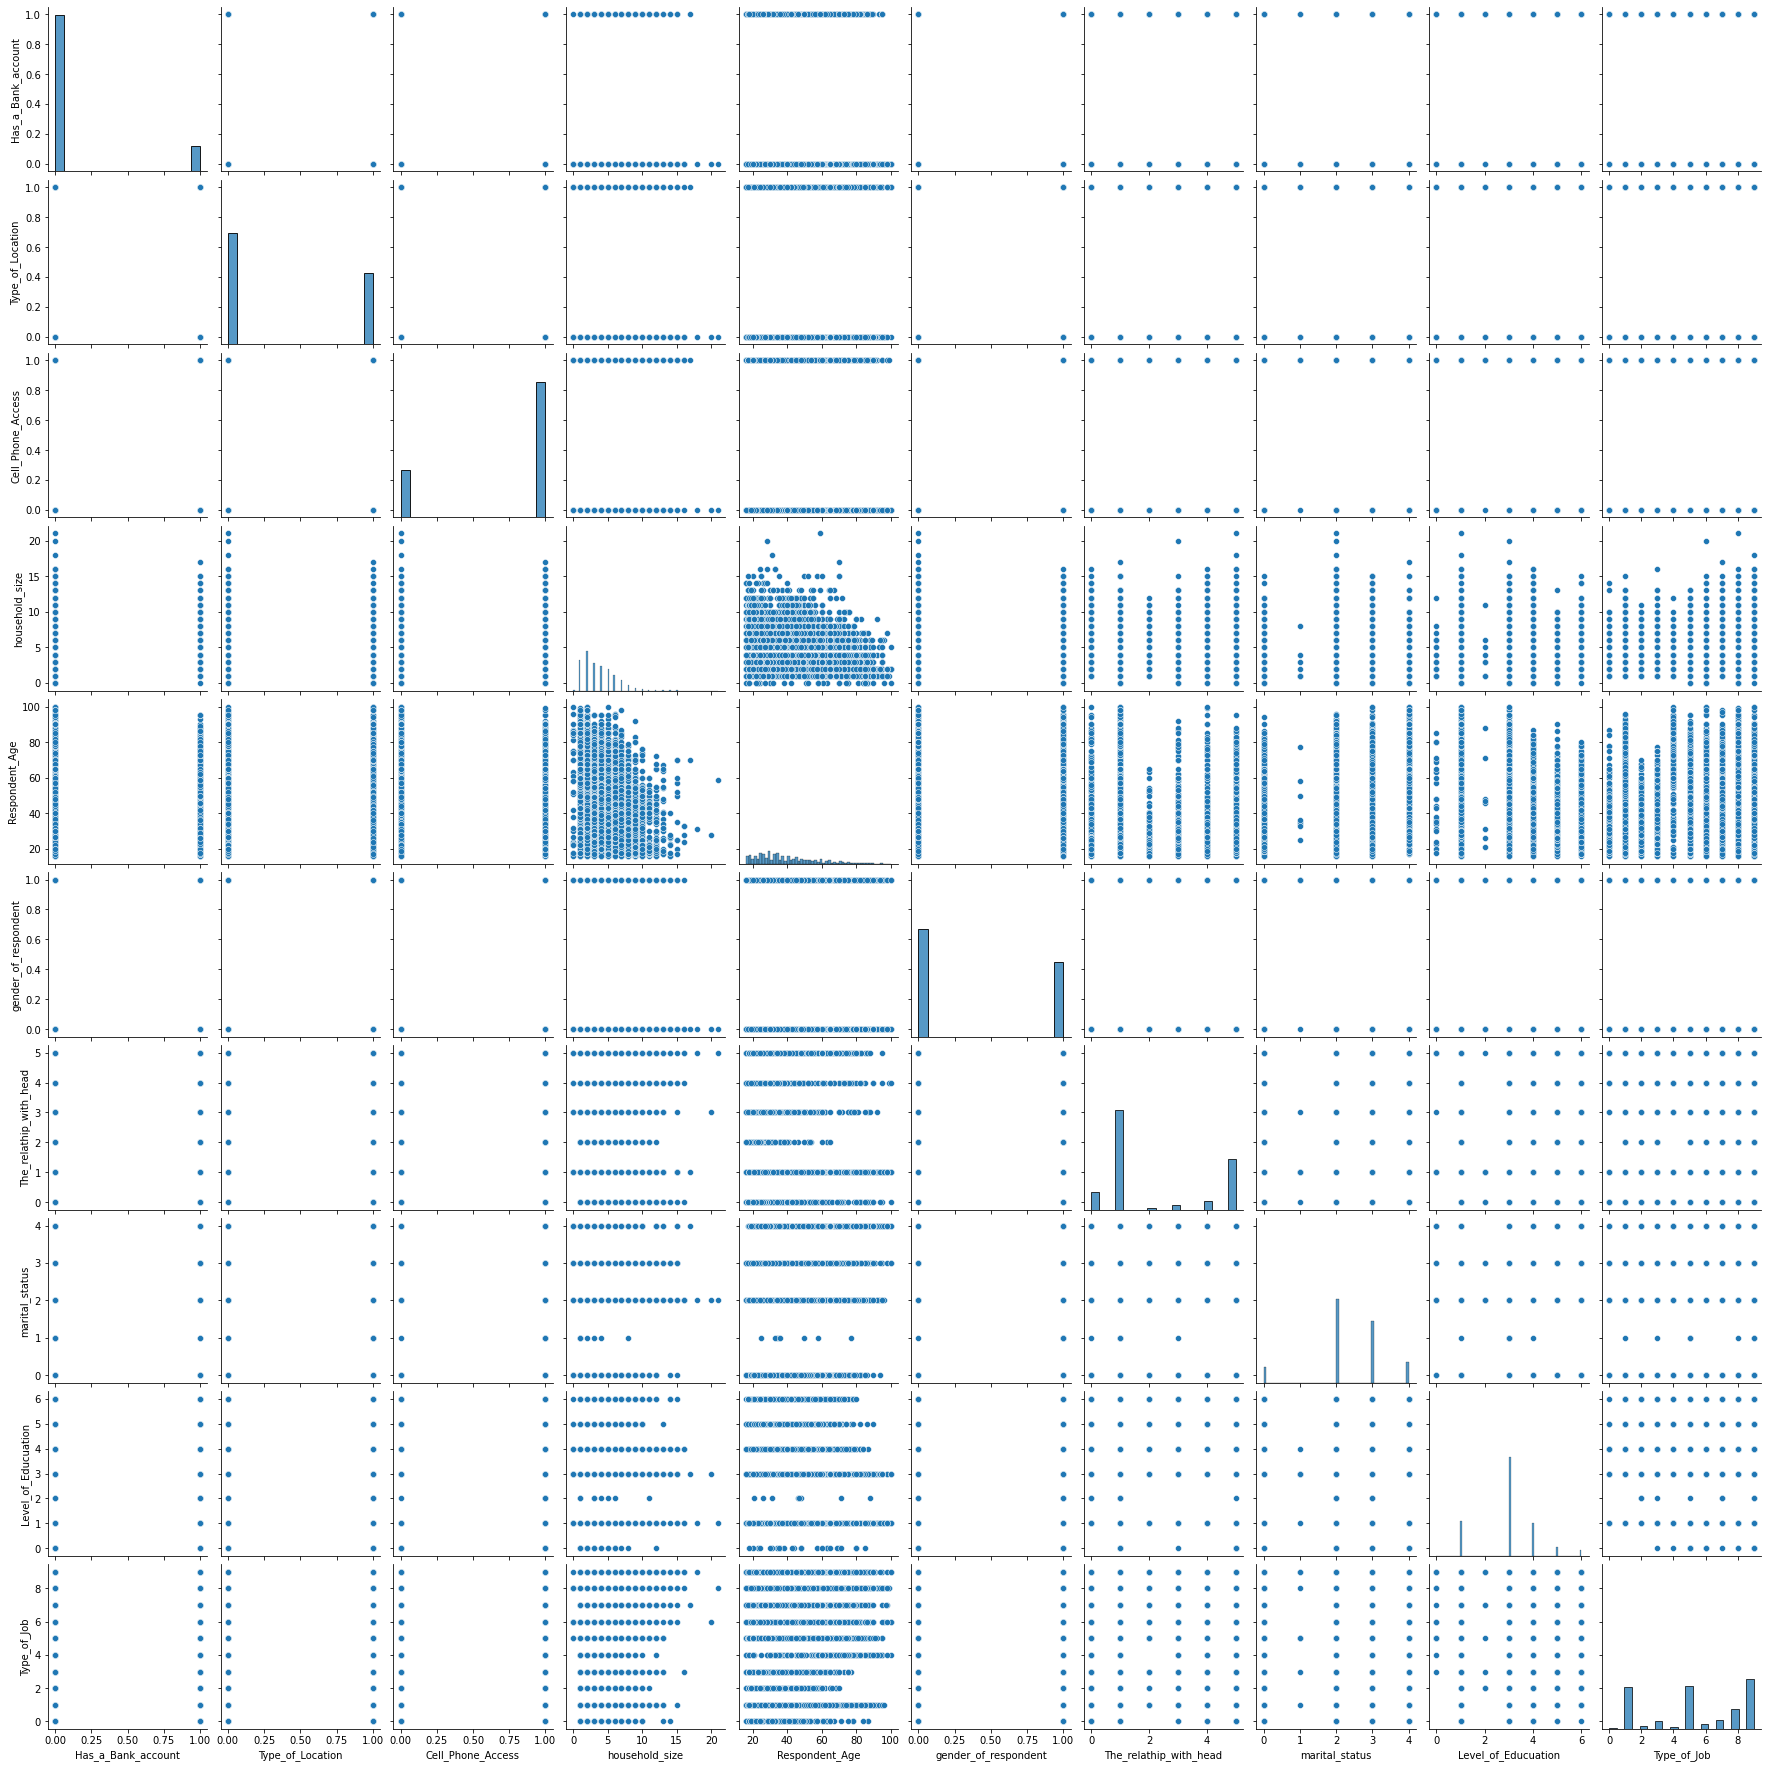

In [326]:
#The bivariate distribution plots help us to study the relationship between two variables by analyzing the scatter plot, 
#and we use the pairplot() function of the seaborn package to plot the bivariate distributions.
sns.pairplot(Financial_Dataset)

**The correlation matrix**

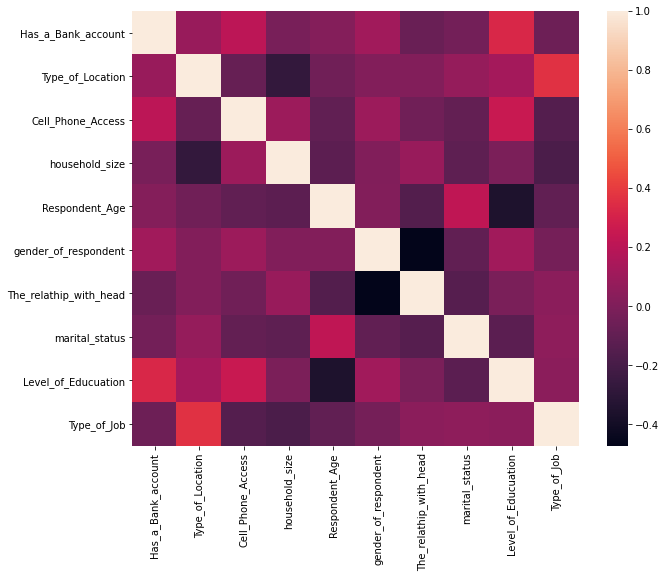

In [327]:
#This analysis allows you to see which pairs have the highest correlation, the pairs which are highly correlated
#represent the same variance of the dataset thus we can further analyze them to understand which attribute among 
#the pairs are most  significant for building the model.

f ,ax = plt.subplots(figsize=(10, 8))
corr = Financial_Dataset.corr()
sns.heatmap(corr,
            xticklabels=corr.columns.values,
            yticklabels=corr.columns.values)

#Principal Component Analysis

In [328]:
# Step1:The first preprocessing step is to divide the dataset  into dependent and predictor variables
X = Financial_Dataset.drop('Has_a_Bank_account', 1)
y = Financial_Dataset['Has_a_Bank_account']


In [329]:
#Check x data
X.shape

(23343, 9)

In [195]:
#Check Y data
y.shape

(23343,)

In [196]:
# Step 2: Splitting the dataset into the Training set and Test set

from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

In [197]:
# Step 3: Normalization
# We will perform standard scalar normalization to normalize our feature set. 

from sklearn.preprocessing import StandardScaler

sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

In [198]:
# Step 4: Applying PCA
# Performing PCA using Scikit-Learn is a two-step process:
# Initialize the PCA class by passing the number of components to the constructor.
# Call the fit and then transform methods by passing the feature set to these methods. 
# The transform method returns the specified number of principal components.
# Let's take a look at the following code. In the code above, we create a PCA object named pca. 
# We did not specify the number of components in the constructor. 
# Hence, all four of the features in the feature set will be returned for both the training and test sets.

from sklearn.decomposition import PCA

pca = PCA()
X_train = pca.fit_transform(X_train)
X_test = pca.transform(X_test)

In [199]:
# Step 5: Explained Variance Ratio
# The PCA class contains explained_variance_ratio_ which returns the variance caused by each of the principal components. 
explained_variance = pca.explained_variance_ratio_

# The explained_variance variable is now a float type array which contains variance ratios for each principal component. 
# The values for the explained_variance variable looks like what is shown in the output. 
# It can be seen that first principal component is responsible for 18.9% variance. 
# Similarly, the least principal component causes 5.05% variance in the dataset. 
explained_variance

array([0.18898648, 0.17765119, 0.17083783, 0.10646128, 0.09283436,
       0.08177067, 0.06958039, 0.06132706, 0.05055074])

In [200]:
# Step 6: Using 1 Principal Component
 
from sklearn.decomposition import PCA

pca = PCA(n_components=1)
X_train = pca.fit_transform(X_train)
X_test = pca.transform(X_test)


In [201]:
# Step 7: Training and Making Predictions
# Via random forest classification for making the predictions.
from sklearn.ensemble import RandomForestClassifier

classifier = RandomForestClassifier(max_depth=2, random_state=0)
classifier.fit(X_train, y_train)

# Predicting the Test set results
y_pred = classifier.predict(X_test)

In [202]:
# Step 8: Performance Evaluation
# 
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score

cm = confusion_matrix(y_test, y_pred)
print(cm)
print('Accuracy' , accuracy_score(y_test, y_pred))

# the random forest algorithm with only one feature, is able to correctly predict out put at 85.84% accuracy.

[[4008    0]
 [ 661    0]]
Accuracy 0.8584279288926965


#**Factor Analysis**

In [207]:
STEP1
# Installing factor analyzer 
!pip install factor_analyzer==0.2.3

from factor_analyzer.factor_analyzer import calculate_bartlett_sphericity

chi_square_value,p_value=calculate_bartlett_sphericity(Financial_Dataset)
chi_square_value, p_value

# In Bartlett ’s test, the p-value is 0. The test was statistically significant, 
# indicating that the observed correlation matrix is not an identity matrix.

(26019.74903672041, 0.0)

In [211]:
# Step 2:
# Kaiser-Meyer-Olkin (KMO) Test measures the suitability of data for factor analysis. 
# It determines the adequacy for each observed variable and for the complete model. 
# KMO estimates the proportion of variance among all the observed variable. 
# Lower proportion id more suitable for factor analysis. KMO values range between 0 and 1. 
# Value of KMO less than 0.6 is considered inadequate.
# 
from factor_analyzer.factor_analyzer import calculate_kmo

kmo_all,kmo_model=calculate_kmo(Financial_Dataset)


In [212]:
# The overall KMO for our data is 0.84, which is excellent. 
kmo_model

0.5555814391383688

In [213]:
kmo_all

,KMO
Has a Bank account,0.555535
Type of Location,0.579118
Cell Phone Access,0.706438
household_size,0.631779
Respondent Age,0.529859
gender_of_respondent,0.492417
The relathip with head,0.488449
marital_status,0.546404
Level of Educuation,0.566948
Type of Job,0.595880


**Choosing the Number of Factors**

In [217]:
from factor_analyzer import FactorAnalyzer
# Creating factor analysis object and perform factor analysis
fa = FactorAnalyzer()
fa.analyze(Financial_Dataset, 10, rotation=None)

# Checking the Eigenvalues
ev, v = fa.get_eigenvalues()
ev


,Original_Eigenvalues
0,1.799727
1,1.634622
2,1.569395
3,1.085793
4,0.859523
5,0.771802
6,0.731952
7,0.594177
8,0.494224
9,0.458784


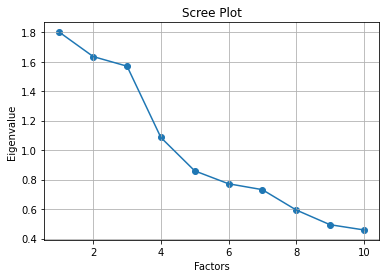

In [219]:
# Creating a scree plot using matplotlib
#
plt.scatter(range(1,Financial_Dataset.shape[1]+1),ev)
plt.plot(range(1,Financial_Dataset.shape[1]+1),ev)
plt.title('Scree Plot')
plt.xlabel('Factors')
plt.ylabel('Eigenvalue')
plt.grid()
plt.show()

**Performing Factor Analysis**

In [220]:
# Creating factor analysis object and perform factor analysis
#
fa = FactorAnalyzer()
fa.analyze(Financial_Dataset, 9, rotation="varimax")
fa.loadings

,Factor1,Factor2,Factor3,Factor4,Factor5,Factor6,Factor7,Factor8,Factor9
Has a Bank account,-0.002186,0.066671,0.010817,0.630421,-0.024727,-0.021295,0.099928,-0.018860,0.015915
Type of Location,0.037097,-0.005216,0.640725,0.124589,0.055958,-0.215185,-0.021685,-0.008662,0.156358
Cell Phone Access,0.131911,0.066007,-0.148311,0.265755,-0.062802,0.066946,0.394168,0.003680,0.001809
household_size,0.082746,-0.034758,-0.252491,-0.022652,-0.084256,0.498081,0.049491,-0.000443,0.001674
Respondent Age,-0.668276,0.074166,-0.103602,0.038496,0.215828,-0.132218,-0.061210,0.055346,-0.014449
gender_of_respondent,-0.004323,0.735318,0.028609,0.095085,-0.184215,0.055517,0.044130,0.109408,0.072195
The relathip with head,0.045155,-0.730110,0.063321,-0.034218,-0.231751,0.113398,-0.027114,0.115256,0.079384
marital_status,-0.148253,0.008681,0.067641,-0.038544,0.553059,-0.067507,-0.040238,-0.004341,-0.000694
Level of Educuation,0.552584,0.063251,0.071971,0.485078,-0.045261,-0.067427,0.147638,0.174541,-0.042050
Type of Job,0.093159,-0.023145,0.583040,-0.090153,0.031655,-0.072254,-0.096605,0.012365,-0.114906


**Getting variance of each factors**

In [221]:

fa.get_factor_variance()


,Factor1,Factor2,Factor3,Factor4,Factor5,Factor6,Factor7,Factor8,Factor9
SS Loadings,0.810285,1.093903,0.861646,0.740700,0.457936,0.347072,0.207451,0.059398,0.051402
Proportion Var,0.081028,0.109390,0.086165,0.074070,0.045794,0.034707,0.020745,0.005940,0.005140
Cumulative Var,0.081028,0.190419,0.276583,0.350653,0.396447,0.431154,0.451899,0.457839,0.462979


# **Discriminant Analysis**

In [222]:
#Creating data frame
X = Financial_Dataset.iloc[:, 0:9].values
y = Financial_Dataset.iloc[:, 0].values

*Next divide the data into training and test sets*

In [223]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

*Feature scaling*

In [224]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

*Peforming LDA*

In [225]:
# The LinearDiscriminantAnalysis class of the sklearn.discriminant_analysis 

from sklearn.discriminant_analysis import LinearDiscriminantAnalysis as LDA
lda = LDA(n_components=1)
X_train = lda.fit_transform(X_train, y_train)
X_test = lda.transform(X_test)


*Training and Making Predictions*

In [226]:
from sklearn.ensemble import RandomForestClassifier

classifier = RandomForestClassifier(max_depth=2, random_state=0)
classifier.fit(X_train, y_train)
y_pred = classifier.predict(X_test)


In [228]:
y_pred 

array([0, 0, 0, ..., 0, 0, 0], dtype=int8)

*Evaluating the Performance*

In [227]:
# with the help of a confusion matrix and we find the accuracy of the prediction.
# 

from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score

cm = confusion_matrix(y_test, y_pred)
print(cm)
print('Accuracy' + str(accuracy_score(y_test, y_pred)))

[[4008    0]
 [   0  661]]
Accuracy1.0


*We can see that with one linear discriminant, the algorithm achieved an accuracy of 100%*

#Analysis Finings

* Residenscial location doest influece account ownership.
* Mobile phone access has great influence on bank account ownership.
* Level of education and type of job has influence on account ownership.



#*Challenging the solution*

*Further analysis could be carried out via (probit and Logistic) regression*

#*Follow up questions*
*At this point, we can refine our question or collect new data, all in an iterative process to get at the truth.*

* Did we have the right data? *yes*
* Do we need other data to answer our question? *yes*

